In [1]:
%tensorflow_version 2.x

In [2]:
import pandas as pd

In [15]:
import numpy as np

In [3]:
# import tensorflow as tf
import sklearn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Given information of a person about age, sex, bmi, the number of children that person has, whether that person smokes, where he/she lives; prediction the amount of charges he/she will pay for treatment.

In [7]:
# checking columms's type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Is it a good practice to always check for NaN values?

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# encoding the string feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# sex
df['sex'] = encoder.fit_transform(df['sex'])
# smoker
df['smoker'] = encoder.fit_transform(df['smoker'])
# region
df['region'] = encoder.fit_transform(df['region'])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
# checking feature correlation
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

seemingly impactful aspects to 'charges' are 'smoker', 'age', 'bmi'

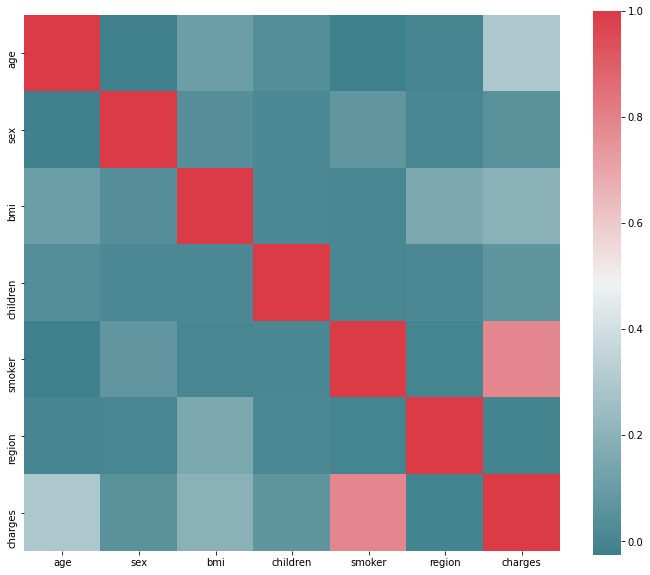

In [18]:
# plot correlation on the heatmap
f, ax = plt.subplots(figsize=(12, 10)) # stole >u<
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(210, 10, as_cmap=True), square=True, ax=ax) # straight out stole from internet, will have to learn later >u<

Further see that 'smoker' is very impactful on 'charges'.

So assuming with just answering "smoking or not?" will greatly guide the answer.

Let's see how smoke and non-smoke people affect other features's influence to 'charges'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


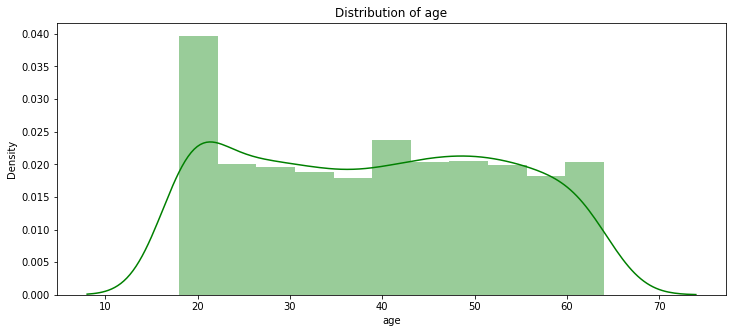

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

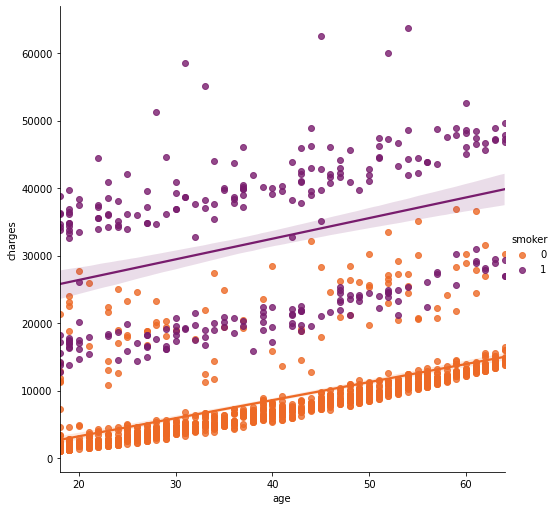

In [22]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

Clearly saw that "smoking or not" categorizes ('age','charges') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


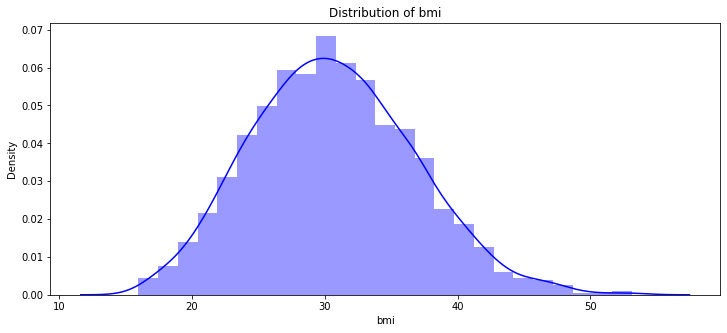

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'b')

?> Gaussian distribution here, will it affects anything?

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

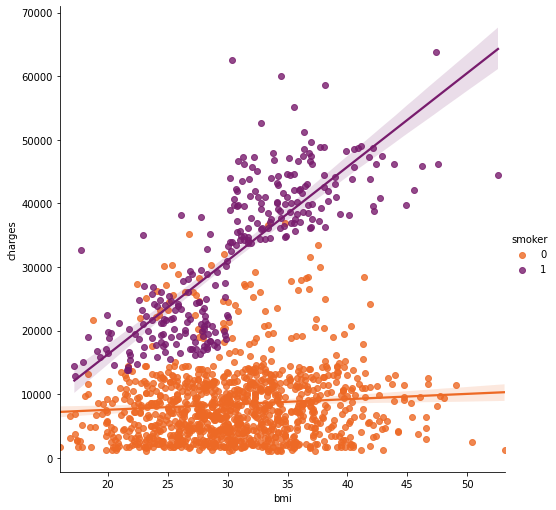

In [24]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

Another proof to see that 'smoker' categorize the impact of 'bmi' to 'charges'

Onto other features: 'sex', 'region', 'children' is discreted. Will we get a visual as clear as with 'bmi' and 'age'?

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


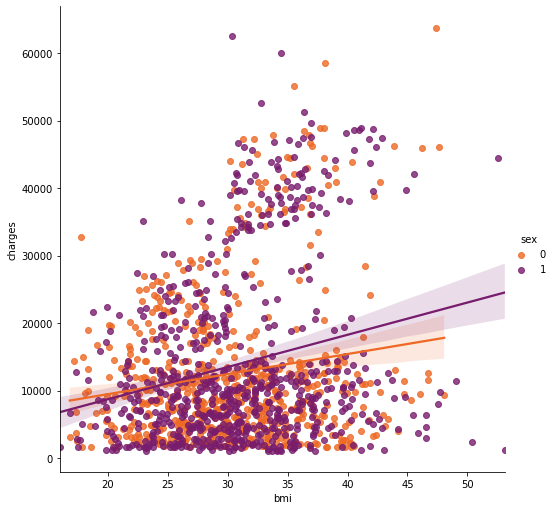

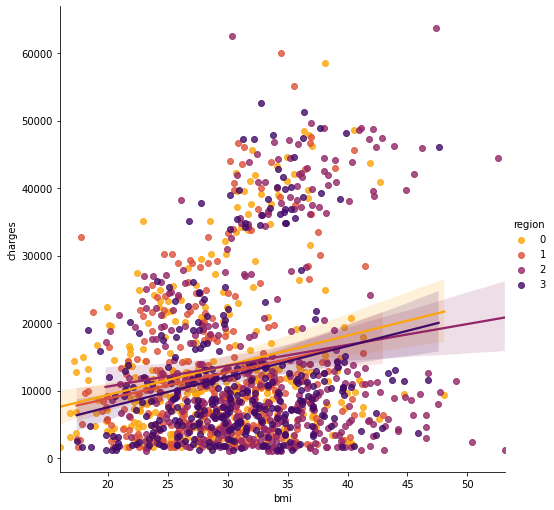

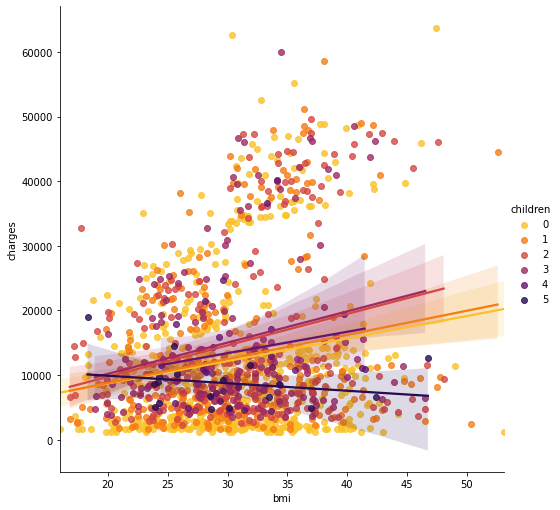

In [30]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=df, palette = 'inferno_r', size = 7)
sns.lmplot(x="bmi", y="charges", hue="region", data=df, palette = 'inferno_r', size = 7)
sns.lmplot(x="bmi", y="charges", hue="children", data=df, palette = 'inferno_r', size = 7)

Here we plot 'bmi'-'charges' and 'sex', 'region' or 'children' don't matter much to the relation

Now let's build the model. First use regular linear regressor in sklearn

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
charges = df['charges']
features = df.drop(['charges'], axis=1)

train_features, test_features, train_charges, test_charges = train_test_split(features, charges, random_state=0)
lr = LinearRegression().fit(train_features, train_charges)

print(lr.score(test_features, test_charges))

0.7962732059725786


79% accuracy here?

Now, since the bmi is Gaussian distributed, should we standardize bmi?

In [37]:
charges = df['charges']
features = df.drop(['charges'], axis=1)

train_features, test_features, train_charges, test_charges = train_test_split(features, charges, random_state=0)
lr1 = LinearRegression(normalize=True).fit(train_features, train_charges)

print(lr1.score(test_features, test_charges))

0.7962732059725786


Not even slightest change. So how about preprocessing the bmi with StandardScaler?

In [39]:
from sklearn.preprocessing import StandardScaler

In [42]:
dfcp = df.copy()
y = df['charges']
x = df.drop(['charges'], axis=1)

Std = StandardScaler()
x.bmi = Std.fit_transform(np.array(x.bmi).reshape(-1,1))

train_x, test_x, train_y, test_y = train_test_split(x, y) # add some randomness to the dataset
lr2 = LinearRegression().fit(train_features, train_charges)

print(lr2.score(test_features, test_charges))

0.7962732059725786


In [43]:
# confirm bmi has been standardized
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,-0.453320,0,1,3
1,18,1,0.509621,1,0,2
2,28,1,0.383307,3,0,2
3,33,1,-1.305531,0,0,1
4,32,1,-0.292556,0,0,1


No change either. So there is no change whether we preprocess the bmi or not

In [47]:
# let's see how close the model predict. Use 1 record from test set
print(test_x[:1])
print(test_y[:1])

pred_y = lr2.predict(test_x[:1])
print(pred_y)

     age  sex       bmi  children  smoker  region
747   19    1 -1.461373         0       0       1
747    1627.28245
Name: charges, dtype: float64
[-7310.36934183]


-7310$ ??? So stupid T^T

In [50]:
# now how about using lr?
print(test_features[1:2])
print(test_charges[1:2])

pred_y = lr.predict(test_features[1:2])
print(pred_y)

     age  sex    bmi  children  smoker  region
610   47    0  29.37         1       0       2
610    8547.6913
Name: charges, dtype: float64
[9764.82733066]


yayyy! seem close enough X3

In [56]:
# a procedure to compare predictions and actual labels
def cmpPredLabel(x_test, y_test, y_pred):
  plt.figure(figsize=(10,6))
  plt.scatter(x_test, y_test,
            c = 'black', marker = 'o', s = 35, alpha = 0.5,
            label = 'Train data')
  plt.scatter(x_test, y_pred,
            c = 'c', marker = 'o', s = 35, alpha = 0.7,
            label = 'Test data')
  plt.xlabel('Predicted values')
  plt.ylabel('Tailings')
  plt.legend(loc = 'upper left')
  # plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
  plt.show()

In [51]:
# now step it up a little
print(test_features[2:10])
print(test_charges[2:10])
print("Test set mean: %f3" % (test_charges[2:10].mean()))

pred_y1 = lr.predict(test_features[2:10])
print(pred_y1)
print("Predicted result mean: %f3" % (pred_y1.mean()))

      age  sex     bmi  children  smoker  region
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1
981    34    1  21.375         0       0       0
31     18    0  26.315         0       0       0
1256   51    0  36.385         3       0       1
1219   38    0  30.210         3       0       1
1320   31    1  31.065         3       0       1
569     45702.02235
1034    12950.07120
198      9644.25250
981      4500.33925
31       2198.18985
1256    11436.73815
1219     7537.16390
1320     5425.02335
Name: charges, dtype: float64
Test set mean: 12424.2250693
[38027.18625354 16076.26656375  7003.05093861  4162.38974052
  1745.17453352 14273.5330135   9022.7490154   7548.70107263]
Predicted result mean: 12232.3813913


The actual result seem a bit off, but the mean is spot on!! Hurrayy (^w^)!

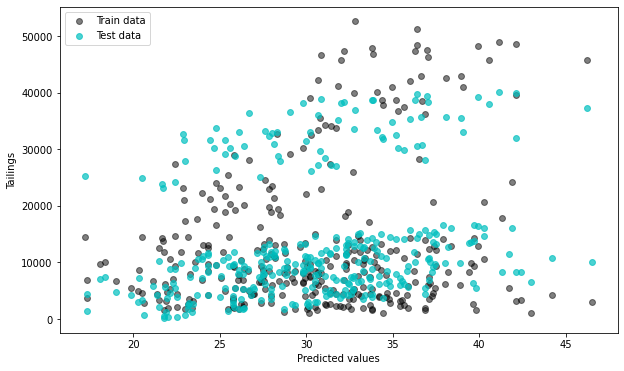

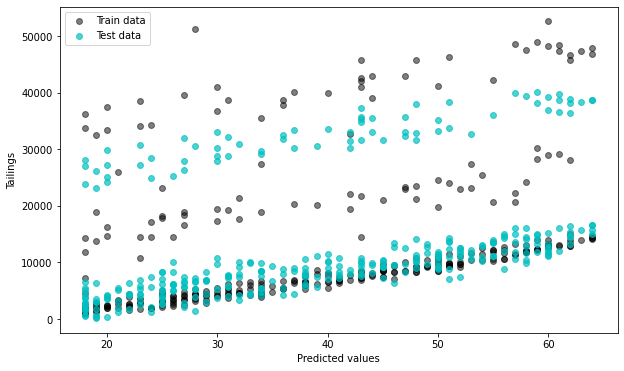

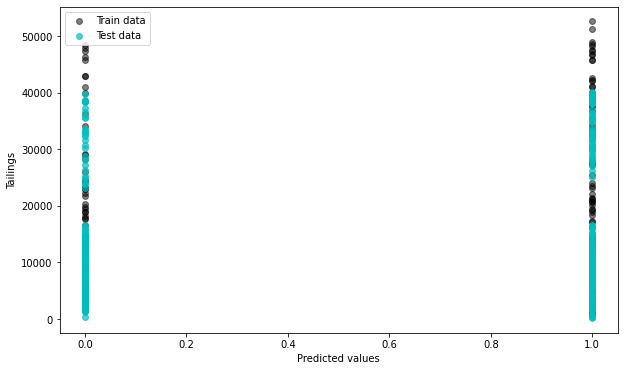

In [62]:
pred_charges = lr.predict(test_features)
cmpPredLabel(test_features['bmi'], test_charges, pred_charges)
cmpPredLabel(test_features['age'], test_charges, pred_charges)
cmpPredLabel(test_features['sex'], test_charges, pred_charges)

That seem reasonable enough, with 0.79 score. But how about more accuracy?

If first answers whether that person is smoking or not, the prediction may differ drastically? So... regression tree/random forest resgression?

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
forest = RandomForestRegressor(random_state=0)

forest.fit(train_features, train_charges)

print(forest.score(test_features, test_charges))

0.8708994825485357


0.87 score! A great improvement !

In [55]:
print(test_features[2:10])
print(test_charges[2:10])
print("Test set mean: %f3" % (test_charges[2:10].mean()))

pred_forest_y = forest.predict(test_features[2:10])
print(pred_forest_y)
print("Predicted result mean: %f3" % (pred_forest_y.mean()))

      age  sex     bmi  children  smoker  region
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1
981    34    1  21.375         0       0       0
31     18    0  26.315         0       0       0
1256   51    0  36.385         3       0       1
1219   38    0  30.210         3       0       1
1320   31    1  31.065         3       0       1
569     45702.02235
1034    12950.07120
198      9644.25250
981      4500.33925
31       2198.18985
1256    11436.73815
1219     7537.16390
1320     5425.02335
Name: charges, dtype: float64
Test set mean: 12424.2250693
[45457.2302254 13203.6317665 10186.9736721 11167.9115235  2322.328778
 12719.5757261  7972.800911   7076.8702597]
Predicted result mean: 13763.4153583


Although the mean is more off than normal linearRegressing but the actual result is much closer.

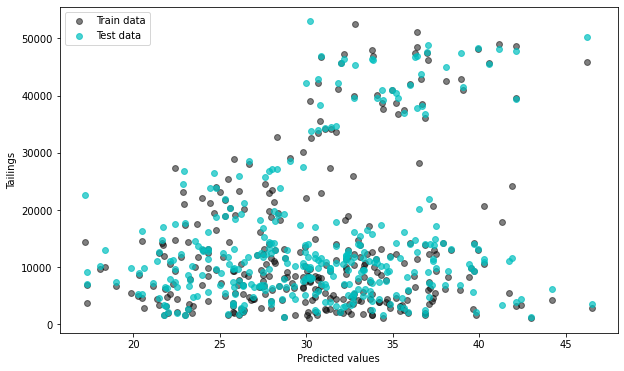

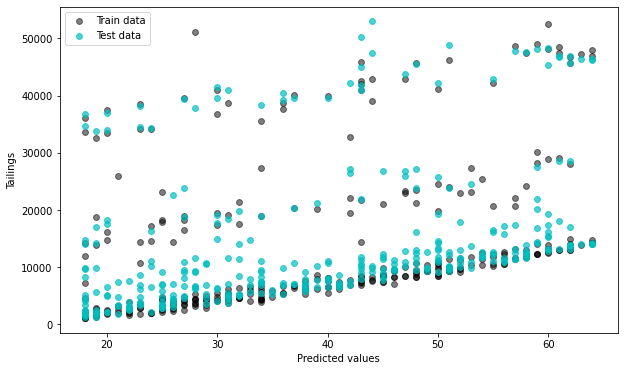

In [61]:
pred_charges = forest.predict(test_features)
cmpPredLabel(test_features['bmi'], test_charges, pred_charges)
cmpPredLabel(test_features['age'], test_charges, pred_charges)

This result is acceptable now, as the prediction is quite close to the actual data.

And that's is the end of this example. I copied a lot of code from internet since i still new to seaborn and sklearn. Will perfects in the future.